## IPL 2022 Capstone Project
The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.

These are some of the important columns that we'll focus on for meaningful insights in this project.  
column names: Variable Type

date : string  
venue : string  
stage : string  
team1 : string  
team2 : string  
toss_winner : string  
toss_decision : string  
first_ings_score : integer  
second_ings_score : integer  
match_winner : string  
won_by : string  
margin : integer  
player_of_the_match : string  
top_scorer : string  
highscore : integer  
best_bowling : string  
best_bowling_fgure : string  
gure : string

## Loading libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


## Basic Information


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

* Check the size of rows and columns of the dataset

In [9]:
print(f'Total Rows: {df.shape[0]} \nTotal Columns: {df.shape[1]}')

Total Rows: 74 
Total Columns: 20


* Now let's see how many columns have null values in total.

In [13]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

## Basic Questions

1. Which team won the most matches?

Text(0.5, 0, 'Matches Won')

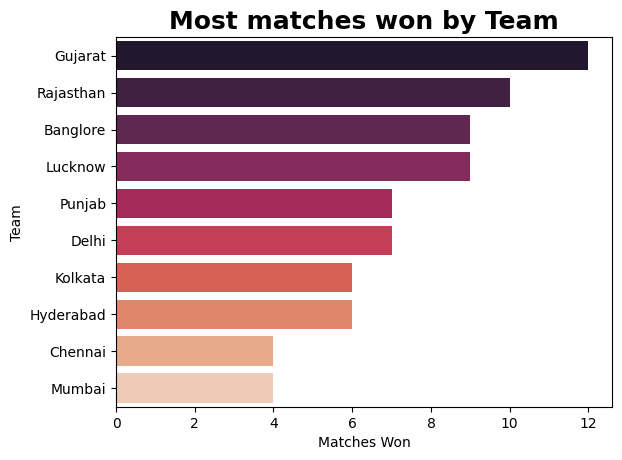

In [37]:
most_wins = df['match_winner'].value_counts()
sns.barplot(y=most_wins.index, x= most_wins.values, palette='rocket')
plt.title('Most matches won by Team', fontsize=18, fontweight='bold')
plt.ylabel('Team')
plt.xlabel('Matches Won')

2. Toss Decision Trends

Text(0, 0.5, 'Decision Counts')

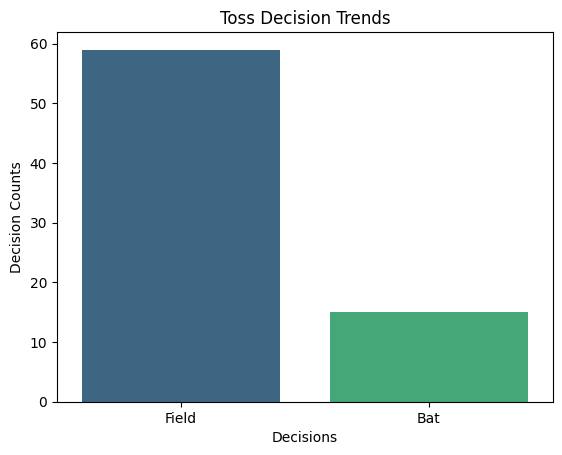

In [54]:
sns.countplot(x=df['toss_decision'], palette='viridis')
plt.title('Toss Decision Trends')
plt.xlabel('Decisions')
plt.ylabel('Decision Counts')

3. Toss Winner vs Match Winner

In [71]:
count = df[df['toss_winner']==df['match_winner']]['match_id'].count()
percent = (count*100)/df.shape[0]
percent.round(2)

np.float64(48.65)

4. How do teams win? (Runs vs Wickets)

In [163]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [164]:
won_by = df['won_by'].value_counts()

<Axes: xlabel='won_by', ylabel='count'>

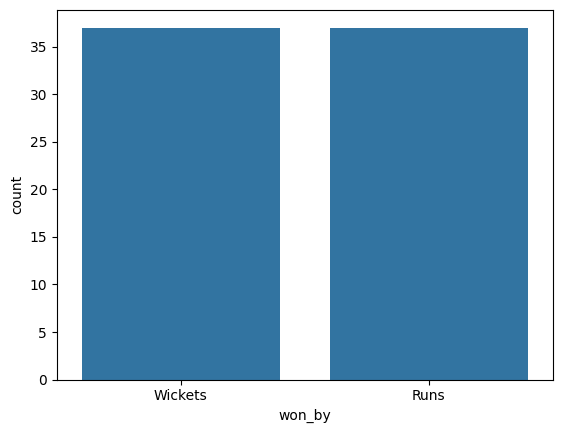

In [165]:
sns.barplot(data=won_by)

## Key Player Performances

1. Most "Player of the Match" Awards

Text(0, 0.5, 'Players')

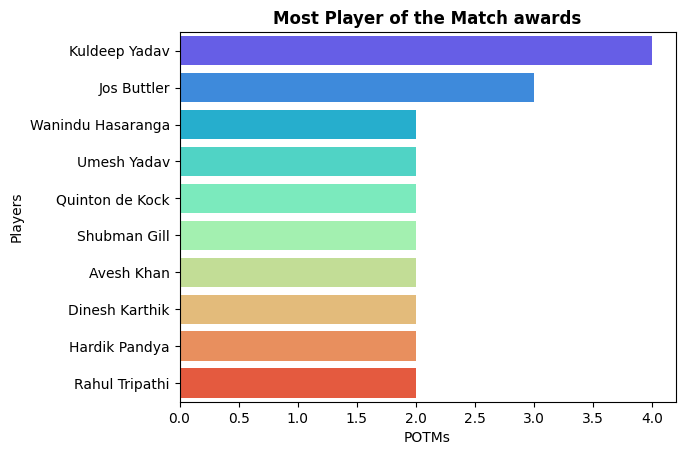

In [127]:
potm = df['player_of_the_match'].value_counts().head(10)
sns.barplot(x=potm.values, y=potm.index, palette='rainbow')
plt.title('Most Player of the Match awards', fontweight='bold')
plt.xlabel('POTMs')
plt.ylabel('Players')

2. Top Scorers

In [143]:
top_scorer = df.groupby('top_scorer')['highscore'].max().sort_values(ascending=False).head(5)

Text(0, 0.5, 'Top Scores')

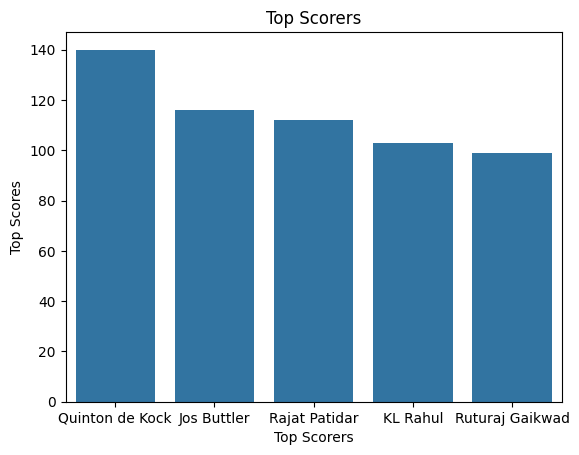

In [147]:
sns.barplot(x=top_scorer.index, y=top_scorer.values)
plt.title('Top Scorers')
plt.xlabel('Top Scorers')
plt.ylabel('Top Scores')

3. 10 Best Bowling Figures

In [178]:
df['highest_wickets']=df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_wickets'].astype(int)

best_bowling_figures = df.groupby('best_bowling_figure')['highest_wickets'].max().sort_values(ascending=False).head(10)
best_bowling_figures = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
best_bowling_figures

best_bowling
Wanindu Hasaranga      45
Umran Malik            45
Avesh Khan            433
Andre Russell          43
Lockie Ferguson        43
Maheesh Theekshana     43
Mohsin Khan            43
Daniel Sams            43
Odean Smith             4
Umesh Yadav             4
Name: highest_wickets, dtype: object

<Axes: ylabel='best_bowling'>

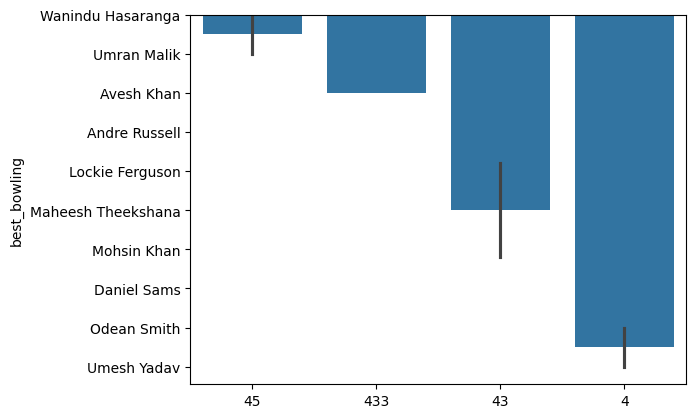

In [179]:
sns.barplot(y=best_bowling_figures.index, x=best_bowling_figures.values)

## Venue Analysis

1. Most Matches Played by Venue

<Axes: ylabel='venue'>

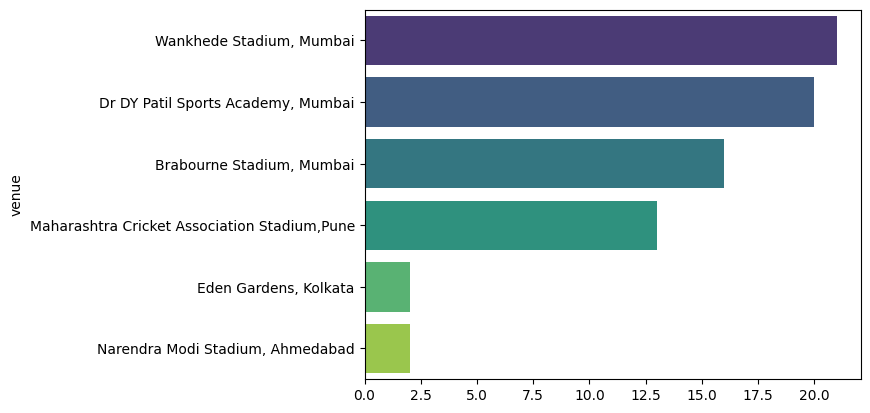

In [190]:
venue = df['venue'].value_counts()
sns.barplot(x=venue.values,y=venue.index, palette='viridis')

## Custom Questions

In [180]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


Q1: Who won the highest margin by runs?

<Axes: xlabel='margin', ylabel='match_winner'>

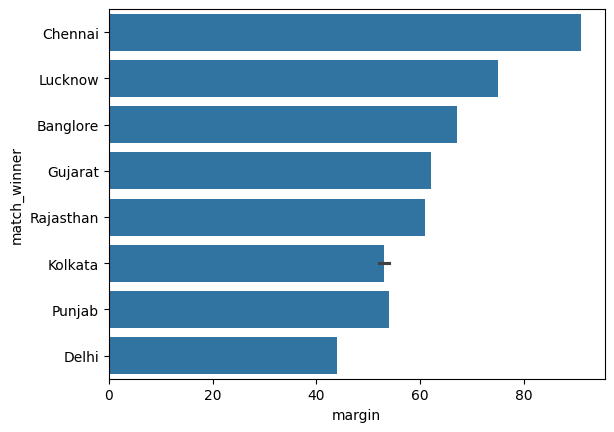

In [204]:
high_margin = df[df['won_by']=='Runs'].sort_values(by='margin',ascending=False).head(10)
sns.barplot(y=high_margin['match_winner'], x=high_margin['margin'])

Which player had the highest individual score?

In [210]:
high_individual=df[['top_scorer', 'highscore']].sort_values(by='highscore', ascending=False).head(10)
high_individual

,top_scorer,highscore
65,Quinton de Kock,140
33,Jos Buttler,116
71,Rajat Patidar,112
72,Jos Buttler,106
25,KL Rahul,103
29,Jos Buttler,103
36,KL Rahul,103
8,Jos Buttler,100
45,Ruturaj Gaikwad,99
30,Faf du Plessis,96


<Axes: xlabel='highscore', ylabel='top_scorer'>

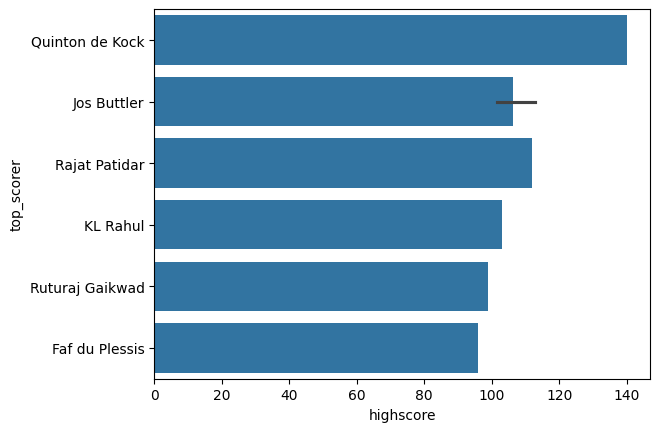

In [212]:
sns.barplot(x=high_individual['highscore'], y=high_individual['top_scorer'])